In [3]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
import keras

In [4]:
from sklearn.svm import SVC
# from ISLP.svm import plot as plot_svm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
from sklearn.metrics import classification_report
from torch.utils import data
from torchvision import transforms
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

This file has the code for the SVM and CNN. 

Loading in the training and testing data. Check their sizes to make sure they align. 

In [10]:
y_training = pd.read_csv('./train/y_train.txt', sep = " ", header=None)
y_training.head(5)

,0
0,5
1,5
2,5
3,5
4,5


In [ ]:
# For column names in pandas dataframe
my_col = [str(i) for i in range(561)]
len(my_col)

561

In [ ]:

x_training = pd.read_csv('./train/X_train.txt', names = my_col, sep = "\s{2}|\s")
print("Num rows: " , x_training.shape[0])
print("Num columns: ", x_training.shape[1])
x_training.head(5)

/var/folders/nb/r2qqfyw914j_b13qw705yqhc0000gn/T/ipykernel_34466/1217672065.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x_training = data = pd.read_csv('./train/X_train.txt', names = my_col, sep = "\s{2}|\s")


Num rows:  7352
Num columns:  561


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
y_testing = pd.read_csv('./test/y_test.txt', sep = " ", header=None)
y_testing.tail(5)

,0
2942,2
2943,2
2944,2
2945,2
2946,2


In [14]:
x_testing = pd.read_csv('./test/X_test.txt', names = my_col, sep = "\s{2}|\s")
print("Num rows: " , x_testing.shape[0])
print("Num columns: ", x_testing.shape[1])
x_testing.head(5)

/var/folders/nb/r2qqfyw914j_b13qw705yqhc0000gn/T/ipykernel_34466/119178259.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x_testing = pd.read_csv('./test/X_test.txt', names = my_col, sep = "\s{2}|\s")


Num rows:  2947
Num columns:  561


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


## Creation of SVM

Model a multi class svm with multiple different kernels to find the best performing one
Because of the limitations of my computer, I only tested then with a C 5 and a degree of 5. 

In [ ]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
              'C':[5], 'degree': [5], 
              'gamma': [0.5]}

In [91]:
best_model1 = GridSearchCV(svm.SVC(), parameters, scoring="accuracy", cv = 5)
best_model1.fit(x_training, y_training)
best_model1.best_params_

/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

{'C': 5, 'degree': 5, 'gamma': 0.5, 'kernel': 'poly'}

In [1]:
best_model1.cv_results_

NameError: name 'best_model1' is not defined

According to this, the SVM with a polynomial kernel and a degree of 5 works best. 
Its average accuracy score is around 94%. 

To confirm that a degree of 5 works best, we run another cross validation with degrees ranging from 0 to 9 but only with a polynomial kernel.

In [94]:
param_grid_2 = {'degree': [1, 3, 5, 7, 10], 'C': [1, 3, 5, 7, 10], 'kernel': ['poly']}


In [95]:
best_model = GridSearchCV(svm.SVC(), param_grid_2, scoring="accuracy", cv = 5)
best_model.fit(x_training, y_training)
best_model.best_params_

/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

{'C': 10, 'degree': 3, 'kernel': 'poly'}

Now, let's fit the model with these parameters and test it with the test data.

In [49]:
poly_svm = svm.SVC(kernel= "poly", degree=3, C= 10).fit(x_training, y_training)
scores = cross_val_score(poly_svm, x_training, y_training, cv=5)
scores.mean()

/Users/merjem/miniforge3/envs/pds/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/envs/pds/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/envs/pds/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/merjem/miniforge3/envs/pds/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was 

0.9449200645587943

In [50]:
poly_pred = poly_svm.predict(x_testing)

In [65]:
from sklearn import metrics

poly_accuracy = accuracy_score(y_testing, poly_pred)
poly_f1 = f1_score(y_testing, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100), "%")
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100), "%")
confus_matrix = metrics.confusion_matrix(y_testing, poly_pred)

Accuracy (Polynomial Kernel):  96.30 %
F1 (Polynomial Kernel):  96.29 %


In [ ]:
confus_matrix

array([[488,   4,   4,   0,   0,   0],
       [ 19, 451,   1,   0,   0,   0],
       [  3,  14, 403,   0,   0,   0],
       [  0,   2,   0, 440,  49,   0],
       [  0,   0,   0,  13, 519,   0],
       [  0,   0,   0,   0,   0, 537]])

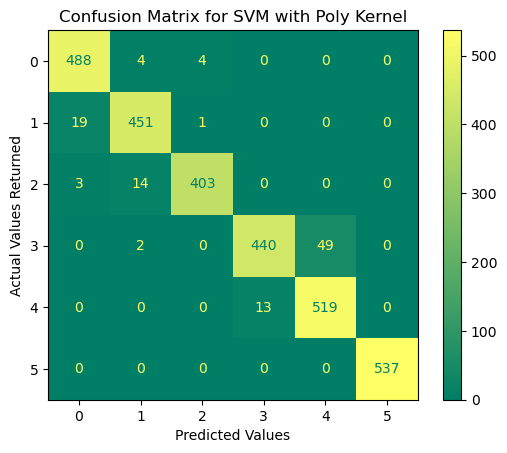

In [ ]:
#convert confusion matrix into a visualization
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confus_matrix)
cm_display.plot(cmap='summer')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values Returned by Model")
plt.title("Confusion Matrix for SVM with Poly Kernel")
# plt.legend(title='Number of matches')
plt.show()


## Creation of CNN

In [ ]:
#appropriate hyperparameters
batch_size = 128
num_classes = 6
epochs = 12

This was an initial version that didn't work properly with the data. It was based on a CNN for photos and originally used Convo2D

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv1D(32, kernel_size=(3),
                 activation='relu',
                 input_shape=(7352, 561)))
cnn_model.add(Conv1D(64, (3), activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

/Users/merjem/miniforge3/envs/pds/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn_y_training = (y_training - 1).to_numpy()
cnn_y_testing = (y_testing - 1).to_numpy()

In [17]:
cnn_x_training = x_training.to_numpy()
cnn_x_testing = x_testing.to_numpy()

In [152]:
type(cnn_y_testing)

numpy.ndarray

In [20]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

cnn_model.fit(cnn_x_training, cnn_y_training,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(cnn_x_testing, cnn_y_testing))
score = cnn_model.evaluate(cnn_x_testing, cnn_y_testing, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 561), dtype=float32). Expected shape (None, 7352, 561), but input has incompatible shape (None, 561)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 561), dtype=float32)
  • training=True
  • mask=None

This is the second version that did work. 

In [ ]:
#make data appropriate for input into the cnn
#need to one hot encode
X_train = x_training.copy().to_numpy()
y_train = pd.get_dummies(y_training[0], dtype='int').to_numpy()
X_test = x_testing.copy().to_numpy()
y_test = pd.get_dummies(y_testing[0], dtype='int').to_numpy()

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print(type(X_train))
print(type(X_test))

# Reshape data to add a 'channel' dimension for Conv1D (CNNs expect 3D input: samples, time steps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test

X_train shape: (7352, 561)
X_test shape: (2947, 561)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:

# number of classes/labels
num_classes = 6

#The actual CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(561, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on our new sized data
history = model.fit(X_train_reshaped, y_train, 
                    epochs=20, 
                    batch_size=32)

# Evaluate the model used built in functions
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.5061 - loss: 1.1587
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.8262 - loss: 0.3995
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.8685 - loss: 0.3083
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8935 - loss: 0.2440
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9230 - loss: 0.1928
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9172 - loss: 0.1984
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9312 - loss: 0.1690
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9428 - loss: 0.1397
Epoch 9/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9436 - loss: 0.1441
Epoch 10/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9540 - loss: 0.1153
Epoch 11/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.9515 - loss: 0.1182
Epoch 12/20
230/230 ━━━━━━━━━━

In [ ]:
#repeat evaluation with test data and predicted values
poly_accuracy = accuracy_score(y_pred, y_true)
poly_f1 = f1_score(y_pred, y_true, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100), "%")
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100), "%")

Accuracy (Polynomial Kernel):  95.18 %
F1 (Polynomial Kernel):  95.20 %


In [ ]:
#create a second confusion matrix
sec_confus_matrix = metrics.confusion_matrix(y_pred, y_true)

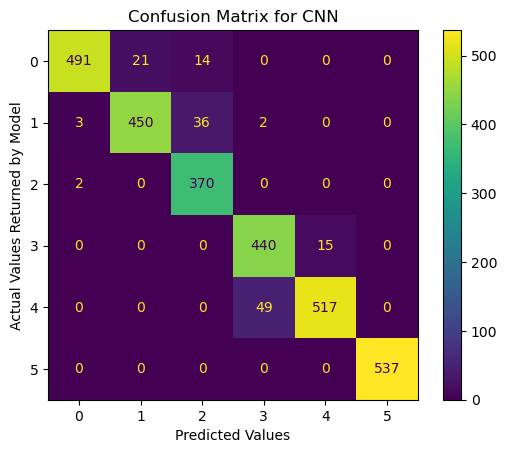

In [ ]:
#diaply teh confusion matrix 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = sec_confus_matrix)
cm_display.plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values Returned by Model")
plt.title("Confusion Matrix for CNN")
# plt.legend(title='Number of matches')
plt.show()